In [1]:
#############################################################################
####################Import all packages######################################
#############################################################################
import os
import random
import numpy as np
#import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
#import pandas_profiling as pp
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.mode.chained_assignment = None  # default='warn'
# Set working directory
#############################################################################
# Make Jupyter Notebook show ALL output of a cell, not only the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#  READING IN DATA
# CLEANED DATA
postflight_2 = pd.read_pickle('../../data/filtered/postflight2_filtered.pkl')

# FILTERED DATA
#post_filt = pd.read_pickle('../new_data/final_data_USE_THIS_ONE/postflight1_filtered.pkl')
#postflight1_pressure = pd.read_pickle('../new_data/final_data_USE_THIS_ONE/postflight1_pressure_below_1500.pkl')



In [4]:
#postflight_2.to_csv('../../data/filtered/postflight2_filtered.csv')

In [13]:
## Remove all unncessary columns
cols_to_keep = ['timeStamp',
                'Exp0_OxygenTemp', 'Exp0_OxygenpercentO2', 'Exp0_PhValue',
                'Exp1_OxygenTemp', 'Exp1_OxygenpercentO2',
                'Pressure_LateAccess']

#pre_and_flight = pre_and_flight[cols_to_keep]
postflight_2 = postflight_1[cols_to_keep]
#extra = extra[cols_to_keep]

In [14]:
# DFs contain negligible amount of missing values (NAs), just drop them
#import missingno as msno
#msno.matrix(postflight_1)
#pre_and_flight.dropna(inplace=True)
#postflight_1.dropna(inplace=True)
#extra.dropna(inplace=True)

In [15]:
postflight_2.reset_index(inplace=True)

In [16]:
# Check the data range of the final timestamps
#pre_and_flight.timeStamp.min()
#pre_and_flight.timeStamp.max()
postflight_2.timeStamp.min()
postflight_2.timeStamp.max()
#postflight_2.timeStamp.min()
#postflight_2.timeStamp.max()

#extra.timeStamp.min()
#extra.timeStamp.max()


Timestamp('2019-03-15 09:49:07')

Timestamp('2019-04-11 13:01:16')

In [48]:
post_filt.columns

Index(['index', 'timeStamp', 'Exp0_OxygenTemp', 'Exp0_OxygenpercentO2', 'Exp0_PhValue', 'Exp1_OxygenTemp', 'Exp1_OxygenpercentO2', 'Pressure_LateAccess'], dtype='object')

In [47]:
#date_diff = pd.to_datetime('2019-03-11  13:20:00') - pd.to_datetime('2000-01-01 14:30:02')
#postflight_1.timeStamp = postflight_1.timeStamp + date_diff



In [66]:
#postflight_2['ph_rolling'] = postflight_2.Exp0_PhValue.rolling(100).mean()
#postflight_2['OxPer_1_rolling'] = postflight_2.Exp1_OxygenpercentO2.rolling(100).mean()
#postflight_2['OxPer_0_rolling'] = postflight_2.Exp0_OxygenpercentO2.rolling(100).mean()


In [10]:
postflight_2.shape
postflight_2.head(20)

(353578, 13)

,timeStamp,Exp0_OxygenTemp,Exp0_OxygenpercentO2,Exp0_PhValue,Exp1_OxygenTemp,Exp1_OxygenpercentO2,Pressure_LateAccess,year,month,day,hour,minute,second
0,2019-03-15 09:49:07,23.667,19.830,7.078,21.927,1.146,946.6,2019,3,15,9,49,7
1,2019-03-15 09:49:17,23.672,15.297,7.078,21.927,0.811,946.6,2019,3,15,9,49,17
2,2019-03-15 09:49:27,23.683,15.297,7.077,21.929,0.804,946.4,2019,3,15,9,49,27
3,2019-03-15 09:49:37,23.685,15.296,7.076,21.932,0.808,946.3,2019,3,15,9,49,37
4,2019-03-15 09:49:47,23.685,15.297,7.076,21.937,0.809,946.6,2019,3,15,9,49,47
5,2019-03-15 10:07:52,0.000,0.000,0.000,0.000,0.000,946.4,2019,3,15,10,7,52
6,2019-03-15 10:07:57,23.872,19.872,0.000,22.150,4.666,946.4,2019,3,15,10,7,57
7,2019-03-15 10:08:02,23.872,15.292,7.034,22.150,3.601,946.4,2019,3,15,10,8,2
8,2019-03-15 10:08:07,23.872,15.289,7.037,22.155,3.616,946.5,2019,3,15,10,8,7
9,2019-03-15 10:08:12,23.875,15.297,7.039,22.158,3.654,946.4,2019,3,15,10,8,12


In [68]:
# Upsampling DateTimeIndex to also get Missing NaN values so we can show them as missing later in the plot
#postflight_1.index = postflight_1.set_index('timeStamp').resample('1S').first().asfreq('s').index
#back_postlight = postflight_1.copy()
#postflight_1 = postflight_1.set_index('timeStamp').resample('1S').first().asfreq('s')


In [141]:

#plt.plot(post_filt.index, post_filt.Pressure_LateAccess, '-', lw=2)
#postflight_1[(postflight_1.Pressure_LateAccess < 1300) & (postflight_1.Pressure_LateAccess > 900) ].Pressure_LateAccess.plot()
#postflight_1.head(50)
#plt.rcParams['figure.figsize'] = 20, 10
#plt.rc('font', family='serif', serif='Times')
#plt.rc('text', usetex=False)
#plt.rc('xtick', labelsize=15)
#plt.rc('ytick', labelsize=15)
#plt.rc('axes', labelsize=15)
#sns.set_style("whitegrid")
#postflight_1[(postflight_1.Pressure_LateAccess < 1300) & (postflight_1.Pressure_LateAccess > 900)].Pressure_LateAccess[0:10]


timeStamp
2019-03-11 12:01:27    960.1
2019-03-11 12:01:32    960.5
2019-03-11 12:01:37    960.5
2019-03-11 12:01:43    960.4
2019-03-11 12:01:48    960.6
2019-03-11 12:01:53    960.6
2019-03-11 12:01:58    960.5
2019-03-11 12:02:02    960.5
2019-03-11 12:02:07    960.2
2019-03-11 12:02:12    960.3
Name: Pressure_LateAccess, dtype: float64

In [17]:
#postflight_1['timeStamp_2'] = postflight_1.timeStamp.shift(1)
#postflight_1['rose'] = (postflight_1[['timeStamp', 'timeStamp_2']].apply(lambda x: (x.timeStamp - x.timeStamp_2)/np.timedelta64(1,'s'),axis=1) > 7)

In [19]:
#postflight_1.rose.sum()

168

In [ ]:
# Now write a for loop, go through the index and where rose == True, append an extra NaN

In [17]:
#empty_ser = pd.Series()
#import numpy as np

#for row in postflight_1.rose.index[0:10]:    
#    if postflight_1.loc[row, 'rose'] == False:
#        empty_ser.append(postflight_1.loc[row, 'timeStamp'])
#    if postflight_1.loc[row, 'rose'] == True:
#        empty_ser.append(postflight_1.loc[row, 'timeStamp'])
#        empty_ser.append(np.nan)
    
    
    

In [82]:
post_filt = postflight_2[(postflight_2.Exp0_OxygenTemp > 15) & (
                            postflight_2.Exp1_OxygenTemp > 15) & (
                            postflight_2.Exp1_OxygenpercentO2 > 0) & (
                            postflight_2.Exp1_OxygenpercentO2 < 100)& (
                            postflight_2.Exp0_OxygenpercentO2 > 0) & (
                            postflight_2.Exp0_OxygenpercentO2 < 100) & (
                            postflight_2.Exp0_OxygenpercentO2 > 0) & (
                            postflight_2.Exp0_OxygenpercentO2 < 100
                            ) & (
                            postflight_2.Pressure_LateAccess < 1040
                            ) & (
                            postflight_2.Pressure_LateAccess > 900
                            ) ]



In [83]:
post_filt['ph_rolling'] = post_filt.Exp0_PhValue.rolling(100).mean()
post_filt['OxPer_1_rolling'] = post_filt.Exp1_OxygenpercentO2.rolling(100).mean()
post_filt['OxPer_0_rolling'] = post_filt.Exp0_OxygenpercentO2.rolling(100).mean()
post_filt['PressLA'] = post_filt.Pressure_LateAccess.rolling(100).mean()

(array([737135., 737139., 737143., 737147., 737150., 737154., 737158.]),
 <a list of 7 Text xticklabel objects>)

Text(0, 0.5, 'Water temperature \n [C°]')

Text(0.5, 0, 'Time  \n [Day-Hour:Minute]')

Text(0.5, 1.0, 'Water temperature [Exp0_Flight module]')

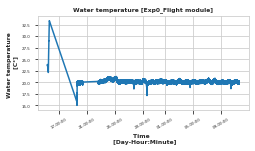

In [84]:
import numpy as np
import matplotlib as mpl
from matplotlib import dates as mdates
import matplotlib.pyplot as plt

plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)
plt.rc('axes', labelsize=6)
sns.set_style("whitegrid")

# width as measured in inkscape
width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.30, right=.99, top=.90)

plt.plot( #data= post_filt   ,
                 
    post_filt.timeStamp,
    #                y =
    post_filt.Exp0_OxygenTemp
            )
         

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))
plt.xticks(rotation=30, ha='center', va='top')

plt.tick_params(axis='both',bottom=True, top=False, left=True, right=False, direction='out', which='major')

ax.set_ylabel("Water temperature \n [C°]", fontsize='6', fontweight='bold')
ax.set_xlabel("Time  \n [Day-Hour:Minute]", fontsize='6', fontweight='bold')
plt.title('Water temperature [Exp0_Flight module]', fontsize='6', fontweight='bold')

fig.set_size_inches(width, height)
fig.savefig('Water_temperature_Exp0_Flight_module.png', dpi=500)


(array([737135., 737139., 737143., 737147., 737150., 737154., 737158.]),
 <a list of 7 Text xticklabel objects>)

Text(0, 0.5, 'Water temperature \n [C°]')

Text(0.5, 0, 'Time  \n [Day-Hour:Minute]')

Text(0.5, 1.0, 'Water temperature [Exp1_Flight module]')

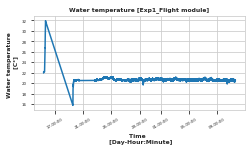

In [85]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)
plt.rc('axes', labelsize=6)
sns.set_style("whitegrid")


# width as measured in inkscape
width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.30, right=.99, top=.90)

plt.plot(            
            post_filt.timeStamp,
             post_filt.Exp1_OxygenTemp
            )

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))
plt.xticks(rotation=30, ha='center', va='top')
#plt.yticks(fontsize=3)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=False, direction='out', which='major')

ax.set_ylabel("Water temperature \n [C°]", fontsize='6', fontweight='bold')
ax.set_xlabel("Time  \n [Day-Hour:Minute]", fontsize='6', fontweight='bold')
plt.title('Water temperature [Exp1_Flight module]', fontsize='6', fontweight='bold')

#figure = plot.get_figure()    
#figure.set_size_inches(28, 10)
#plt.tight_layout()
#figure.savefig('../output/Oxy_test.png', dpi=500)

fig.set_size_inches(width, height)

fig.savefig('Water_temperature_Exp1_Flight_module.png', dpi=1000)
#plt.show()

(array([737135., 737139., 737143., 737147., 737150., 737154., 737158.]),
 <a list of 7 Text xticklabel objects>)

Text(0, 0.5, 'Oxygen content \n [%]')

Text(0.5, 0, 'Time  \n [Day-Hour:Minute]')

Text(0.5, 1.0, 'Oxygen content [Exp1_Flight module]')

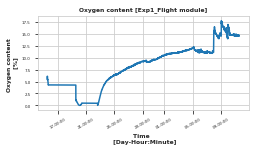

In [86]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)
plt.rc('axes', labelsize=6)



# width as measured in inkscape
width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.30, right=.99, top=.90)

plt.plot(          
           post_filt.timeStamp,
           post_filt.OxPer_1_rolling
            )

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))
plt.xticks(rotation=30, ha='center', va='top')
#plt.yticks(fontsize=3)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=False, direction='out', which='major')

ax.set_ylabel("Oxygen content \n [%]", fontsize='6', fontweight='bold')
ax.set_xlabel("Time  \n [Day-Hour:Minute]", fontsize='6', fontweight='bold')
plt.title('Oxygen content [Exp1_Flight module]', fontsize='6', fontweight='bold')
#plt.show()
#figure = plot.get_figure()    
#figure.set_size_inches(28, 10)
#plt.tight_layout()
#figure.savefig('../output/Oxy_test.png', dpi=500)

fig.set_size_inches(width, height)
fig.savefig('Oxygen_content_Exp1_Flight_module.png', dpi=1000)


(array([737135., 737139., 737143., 737147., 737150., 737154., 737158.]),
 <a list of 7 Text xticklabel objects>)

Text(0, 0.5, 'Oxygen content \n [%]')

Text(0.5, 0, 'Time  \n [Day-Hour:Minute]')

Text(0.5, 1.0, 'Oxygen content [Exp0_Flight module]')

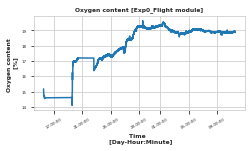

In [87]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)
plt.rc('axes', labelsize=6)


# width as measured in inkscape
width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.30, right=.99, top=.90)

plt.plot(
    
      post_filt.timeStamp,
      post_filt.OxPer_0_rolling
            )

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))
plt.xticks(rotation=30, ha='center', va='top')
#plt.yticks(fontsize=3)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=False, direction='out', which='major')

ax.set_ylabel("Oxygen content \n [%]", fontsize='6', fontweight='bold')
ax.set_xlabel("Time  \n [Day-Hour:Minute]", fontsize='6', fontweight='bold')
plt.title('Oxygen content [Exp0_Flight module]', fontsize='6', fontweight='bold')
#plt.show()
#figure = plot.get_figure()    
#figure.set_size_inches(28, 10)
#plt.tight_layout()
#figure.savefig('../output/Oxy_test.png', dpi=500)

fig.set_size_inches(width, height)
fig.savefig('Oxygen_content_Exp0_Flight_module.png', dpi=1000)


In [88]:
postflight_1.columns

#Water temperature [Exp0_Flight module]
#Water temperature [Exp1_Flight module]
#Oxygen content [Exp0_Flight module]
#Oxygen content [Exp1_Flight module]
#pH Value [Exp0_Flight module]
#Ambient Pressure [Flight module]

Index(['index', 'timeStamp', 'Exp0_OxygenTemp', 'Exp0_OxygenpercentO2', 'Exp0_PhValue', 'Exp1_OxygenTemp', 'Exp1_OxygenpercentO2', 'Pressure_LateAccess'], dtype='object')

(array([737135., 737139., 737143., 737147., 737150., 737154., 737158.]),
 <a list of 7 Text xticklabel objects>)

Text(0, 0.5, 'Ambient Pressure [Flight module] \n [hPa]')

Text(0.5, 0, 'Time  \n [Day-Hour:Minute]')

Text(0.5, 1.0, 'Ambient Pressure [Flight module]')

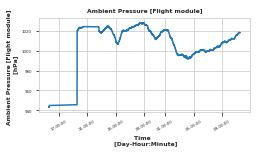

In [89]:
import numpy as np
import matplotlib as mpl

import matplotlib.pyplot as plt

plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)
plt.rc('axes', labelsize=6)
sns.set_style("whitegrid")

# width as measured in inkscape
width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.30, right=.99, top=.90)

plt.plot(
          
           post_filt.timeStamp,
            post_filt.PressLA)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))
plt.xticks(rotation=30, ha='center', va='top')
#plt.yticks(fontsize=3)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=False, direction='out', which='major')

ax.set_ylabel("Ambient Pressure [Flight module] \n [hPa]", fontsize='6', fontweight='bold')
ax.set_xlabel("Time  \n [Day-Hour:Minute]", fontsize='6', fontweight='bold')
plt.title('Ambient Pressure [Flight module]', fontsize='6', fontweight='bold')
#plt.show()
#figure = plot.get_figure()    
#figure.set_size_inches(28, 10)
#plt.tight_layout()
#figure.savefig('../output/Oxy_test.png', dpi=500)

fig.set_size_inches(width, height)
fig.savefig('Ambient_Pressure_Flight_module.png', dpi=1000)




In [ ]:
import numpy as np
import matplotlib as mpl

import matplotlib.pyplot as plt

plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)
plt.rc('axes', labelsize=6)
sns.set_style("whitegrid")

# width as measured in inkscape
width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.30, right=.99, top=.90)

plt.plot(           
           post_filt.timeStamp,
           post_filt.ph_rolling)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))
plt.xticks(rotation=30, ha='center', va='top')
#plt.yticks(fontsize=3)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=False, direction='out', which='major')

ax.set_ylabel("pH Value", fontsize='6', fontweight='bold')
ax.set_xlabel("Time  \n [Day-Hour:Minute]", fontsize='6', fontweight='bold')
plt.title('pH Value [Exp0_Flight module]', fontsize='6', fontweight='bold')
#plt.show()
#figure = plot.get_figure()    
#figure.set_size_inches(28, 10)
#plt.tight_layout()
#figure.savefig('../output/Oxy_test.png', dpi=500)

fig.set_size_inches(width, height)
fig.savefig('Exp0_PhValue_Flight_module.png', dpi=1000)




In [ ]:
#post_filt.to_csv('../new_data/final_data_USE_THIS_ONE/postflight1_filtered.csv')
#postflight_1[postflight_1.Pressure_LateAccess < 1500].to_csv('../new_data/final_data_USE_THIS_ONE/postflight1_pressure_below_1500.csv')
post_filt.to_pickle('../../new_data/final_data_USE_THIS_ONE/postflight2_filtered.pkl')
#postflight_1[postflight_1.Pressure_LateAccess < 1500].to_pickle('../new_data/final_data_USE_THIS_ONE/postflight1_pressure_below_1500.pkl')